# Liver Patient Classification

# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
df = pd.read_csv('ILPD.csv')

In [4]:
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [5]:
df2 = pd.DataFrame(df.columns).T

In [6]:
df.columns = ['Age','Gender','TB Total Bilirubin','DB Direct Bilirubin','Alkphos Alkaline Phosphotase',
              'Sgpt Alamine Aminotransferase','Sgot Aspartate Aminotransferase','TP Total Protiens',
             'ALB Albumin','A/G Ratio Albumin and Globulin Ratio','Class']

In [7]:
df.head()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Class
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [8]:
df['Gender'].value_counts()

Male      441
Female    141
Name: Gender, dtype: int64

In [9]:
##So, we have to add data from df2 to df

In [10]:
df2

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [11]:
df.dtypes

Age                                       int64
Gender                                   object
TB Total Bilirubin                      float64
DB Direct Bilirubin                     float64
Alkphos Alkaline Phosphotase              int64
Sgpt Alamine Aminotransferase             int64
Sgot Aspartate Aminotransferase           int64
TP Total Protiens                       float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Class                                     int64
dtype: object

In [12]:
df2.columns = ['Age','Gender','TB Total Bilirubin','DB Direct Bilirubin','Alkphos Alkaline Phosphotase',
              'Sgpt Alamine Aminotransferase','Sgot Aspartate Aminotransferase','TP Total Protiens',
             'ALB Albumin','A/G Ratio Albumin and Globulin Ratio','Class']

In [13]:
df2.dtypes

Age                                     object
Gender                                  object
TB Total Bilirubin                      object
DB Direct Bilirubin                     object
Alkphos Alkaline Phosphotase            object
Sgpt Alamine Aminotransferase           object
Sgot Aspartate Aminotransferase         object
TP Total Protiens                       object
ALB Albumin                             object
A/G Ratio Albumin and Globulin Ratio    object
Class                                   object
dtype: object

In [14]:
list(df.dtypes[df.dtypes=='int64'].index)

['Age',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Class']

In [15]:
list(df.dtypes[df.dtypes=='float64'].index)

['TB Total Bilirubin',
 'DB Direct Bilirubin',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']

In [16]:
list(df.dtypes[df.dtypes=='object'].index)

['Gender']

In [17]:
df2[['Age',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Class']] = df2[['Age',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Class']].astype(int)

In [18]:
df2[['TB Total Bilirubin',
 'DB Direct Bilirubin',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']] =df2[['TB Total Bilirubin',
 'DB Direct Bilirubin',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']].astype(float)

In [19]:
df2['Gender'] = df2['Gender'].astype(object)

In [20]:
df2.dtypes

Age                                       int32
Gender                                   object
TB Total Bilirubin                      float64
DB Direct Bilirubin                     float64
Alkphos Alkaline Phosphotase              int32
Sgpt Alamine Aminotransferase             int32
Sgot Aspartate Aminotransferase           int32
TP Total Protiens                       float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Class                                     int32
dtype: object

In [21]:
df = df.append(df2)

In [22]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [23]:
##So, now we have values as defined in the original problem

In [24]:
#2. Summarize important observations from the data set (5 MARKS

In [25]:
#Some pointers which would help you, but don’t be limited by these
#a. Find out number of rows; no. & types of variables (continuous, categorical etc.)

In [26]:
df.shape ##(rows,columns)

(583, 11)

In [27]:
df.dtypes

Age                                       int64
Gender                                   object
TB Total Bilirubin                      float64
DB Direct Bilirubin                     float64
Alkphos Alkaline Phosphotase              int64
Sgpt Alamine Aminotransferase             int64
Sgot Aspartate Aminotransferase           int64
TP Total Protiens                       float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Class                                     int64
dtype: object

In [28]:
##For now, we can see that Gender is the only object, but of course, our target variable, class is also an object

In [29]:
df['Class'] = df['Class'].astype(object)

In [30]:
df.dtypes

Age                                       int64
Gender                                   object
TB Total Bilirubin                      float64
DB Direct Bilirubin                     float64
Alkphos Alkaline Phosphotase              int64
Sgpt Alamine Aminotransferase             int64
Sgot Aspartate Aminotransferase           int64
TP Total Protiens                       float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Class                                    object
dtype: object

In [31]:
df.info()  ##To  check null values and dtypes at the same time

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 0
Data columns (total 11 columns):
Age                                     583 non-null int64
Gender                                  583 non-null object
TB Total Bilirubin                      583 non-null float64
DB Direct Bilirubin                     583 non-null float64
Alkphos Alkaline Phosphotase            583 non-null int64
Sgpt Alamine Aminotransferase           583 non-null int64
Sgot Aspartate Aminotransferase         583 non-null int64
TP Total Protiens                       583 non-null float64
ALB Albumin                             583 non-null float64
A/G Ratio Albumin and Globulin Ratio    579 non-null float64
Class                                   583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 54.7+ KB


# Summary of the Dataset

In [33]:
df.describe()  ##Summary for quantitative columns

,Age,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [34]:
##We can note some inferences:
##There is a huge difference between min and mean age, which could signify that the data contains less information about
#people with less ages. Of course we will analyze this more
##There is a huge difference between mean and max DB Direct Bilirubin, which is to be noted for future analysis
##similarly, we can note inferences for all other variables

In [36]:
df.describe(include=object)  ##Summary for Categorical variables

,Gender,Class
count,583,583
unique,2,2
top,Male,1
freq,441,416


In [37]:
df['Gender'].value_counts(normalize=True)*100   ##Percentage of values based on Gender

Male      75.643225
Female    24.356775
Name: Gender, dtype: float64

In [38]:
df['Class'].value_counts(normalize=True)*100   ##Percentage of values based on Class

1    71.35506
2    28.64494
Name: Class, dtype: float64

In [39]:
##Since the minority class here, has more than 20% of values in the data, we can safely say that the data is balanced
#based on the business scenario

# Anomaly Check (Nulls, Outliers, Imbalance)

In [41]:
df.isna().sum()

Age                                     0
Gender                                  0
TB Total Bilirubin                      0
DB Direct Bilirubin                     0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
TP Total Protiens                       0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    4
Class                                   0
dtype: int64

In [42]:
##No missing/null values, except in A/G Ratio Albumin and Globulin Ratio. We will check these

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


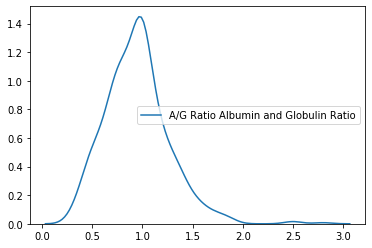

In [43]:
sns.kdeplot(df['A/G Ratio Albumin and Globulin Ratio'])
plt.show()

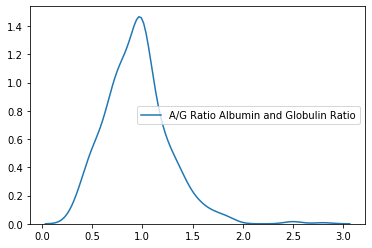

In [44]:
sns.kdeplot(df['A/G Ratio Albumin and Globulin Ratio'].fillna(df['A/G Ratio Albumin and Globulin Ratio'].median()))

In [45]:
##So, we see that median inputation is maintaining data distribution, so we will do that

In [46]:
df['A/G Ratio Albumin and Globulin Ratio'].fillna(df['A/G Ratio Albumin and Globulin Ratio'].median(),inplace=True)

In [47]:
df.isna().sum()

Age                                     0
Gender                                  0
TB Total Bilirubin                      0
DB Direct Bilirubin                     0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
TP Total Protiens                       0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Class                                   0
dtype: int64

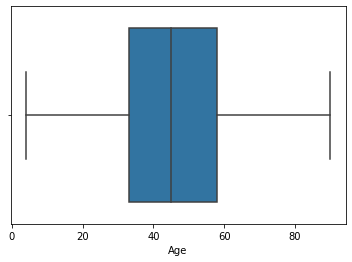

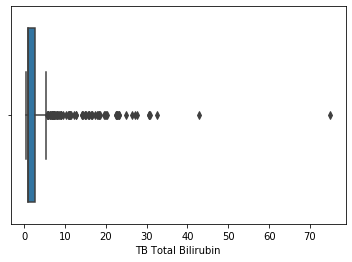

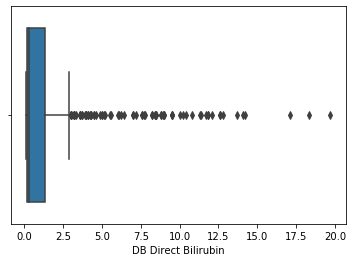

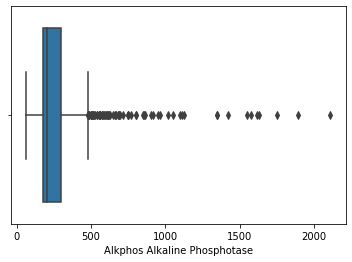

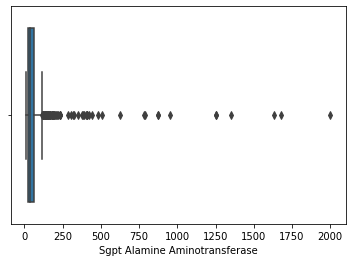

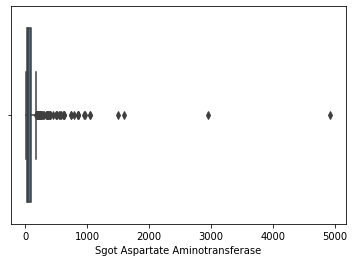

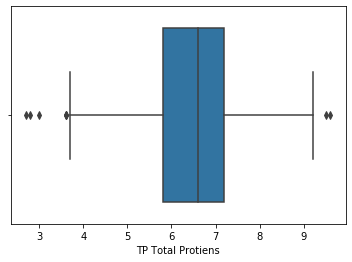

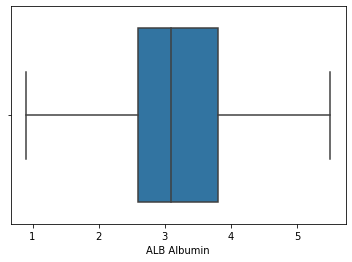

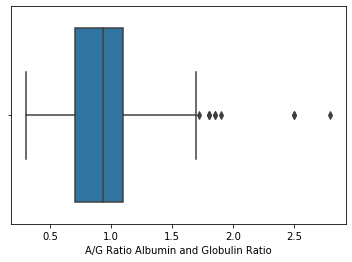

In [49]:
for i in list(df.dtypes[df.dtypes!=object].index):
    sns.boxplot(df[i])
    plt.show()

In [50]:
##We see that 7 quantitative variables have outliers, some of them have too many of them actually

In [51]:
list(df.dtypes[df.dtypes!=object].index)

['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']

In [52]:
#We'll plot the outliers for all variables once more and check

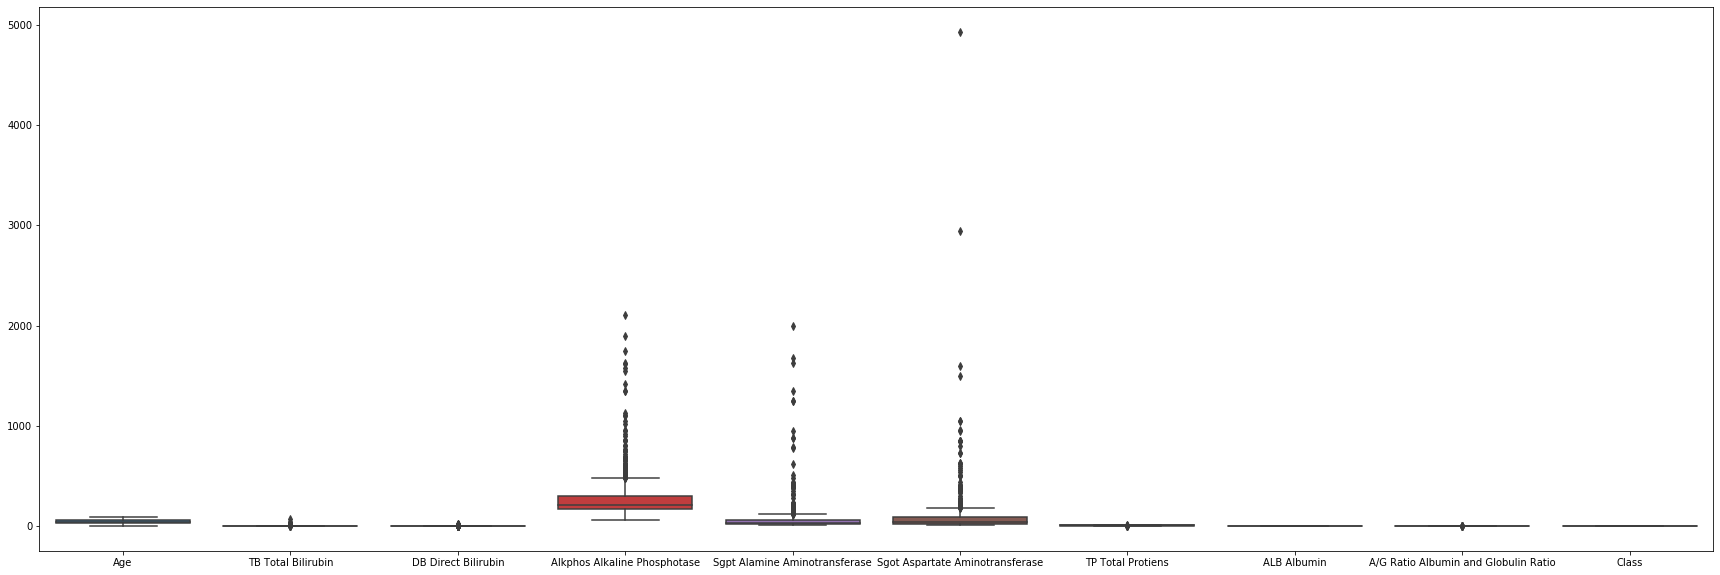

In [53]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df)

In [54]:
##We will remove outliers from 'Sgot Aspartate Aminotransferase' for now:

In [55]:
q1 = df['Sgot Aspartate Aminotransferase'].quantile(0.25)
q3 = df['Sgot Aspartate Aminotransferase'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Sgot Aspartate Aminotransferase']>ll)&(df['Sgot Aspartate Aminotransferase']<ul)]

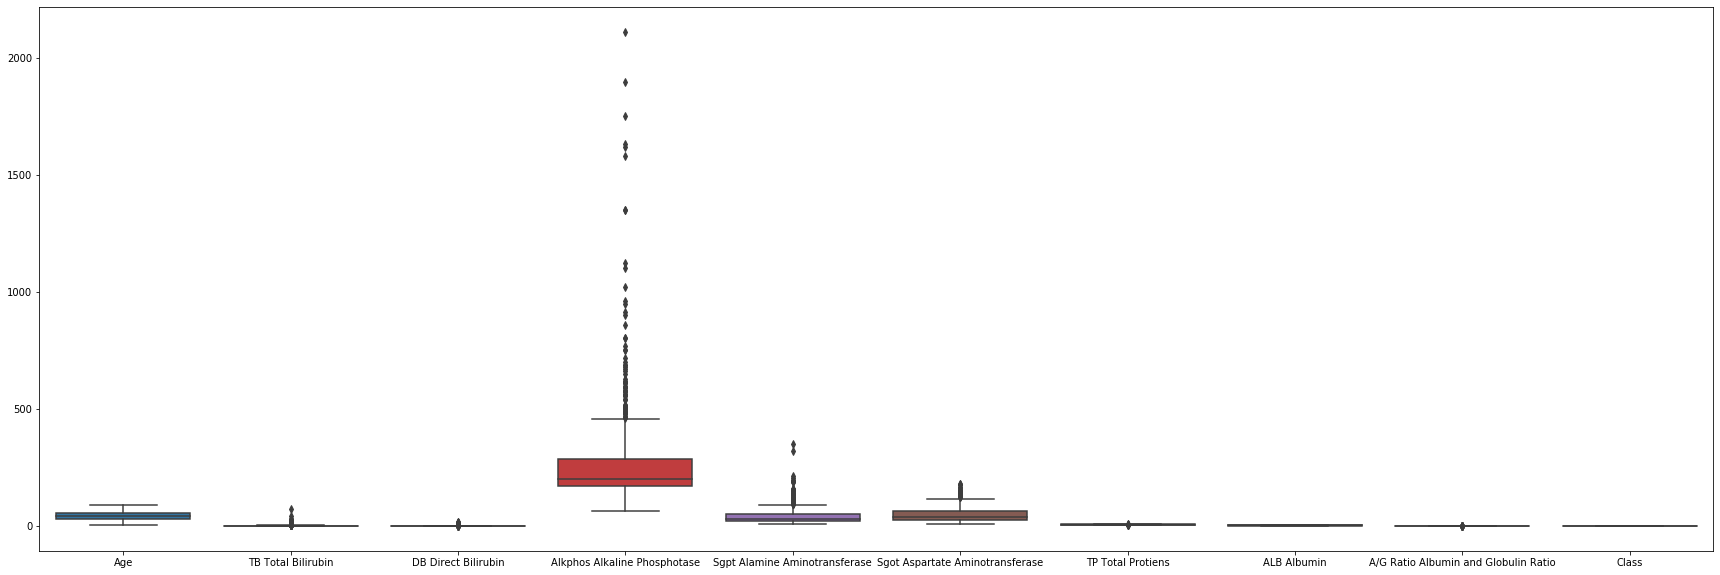

In [56]:
##Checking box plot again:
plt.figure(figsize=(30,10))
sns.boxplot(data=df1)

In [57]:
##Removing from 'Alkphos Alkaline Phosphotase' now:
q1 = df1['Alkphos Alkaline Phosphotase'].quantile(0.25)
q3 = df1['Alkphos Alkaline Phosphotase'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Alkphos Alkaline Phosphotase']>ll)&(df1['Alkphos Alkaline Phosphotase']<ul)]

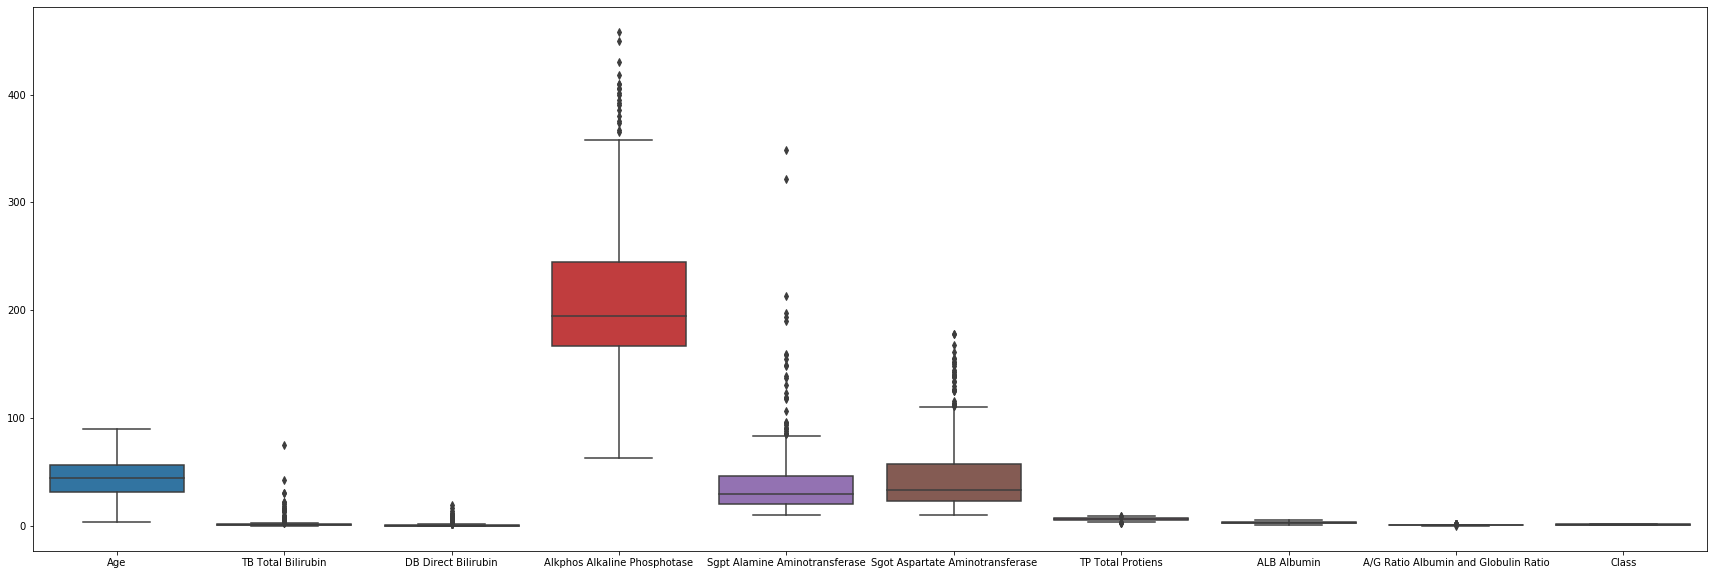

In [58]:
##Checking box plot again:
plt.figure(figsize=(30,10))
sns.boxplot(data=df2)

In [59]:
##Removing from 'TB Total Bilirubin' now:

q1 = df2['TB Total Bilirubin'].quantile(0.25)
q3 = df2['TB Total Bilirubin'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['TB Total Bilirubin']>ll)&(df2['TB Total Bilirubin']<ul)]

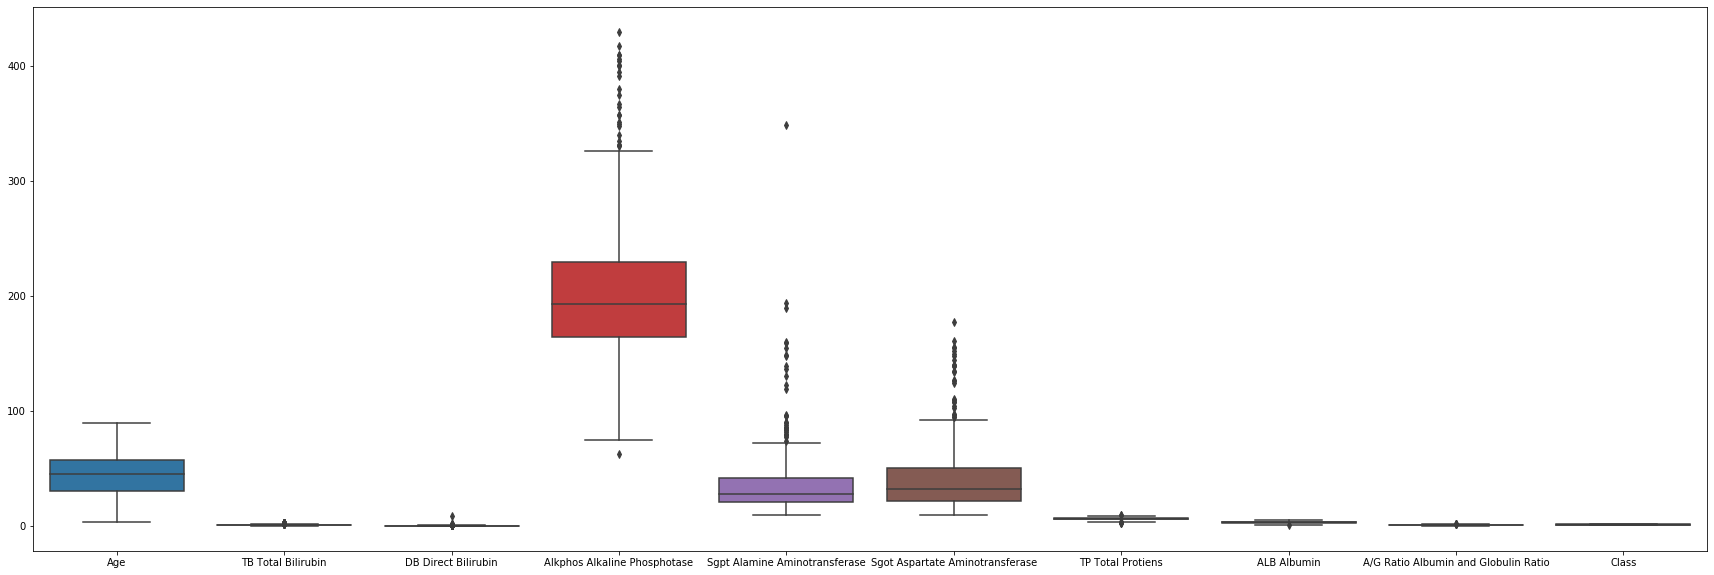

In [60]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df3)

In [61]:
#Removing from 'Sgpt Alamine Aminotransferase' now:
q1 = df3['TB Total Bilirubin'].quantile(0.25)
q3 = df3['TB Total Bilirubin'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['TB Total Bilirubin']>ll)&(df3['TB Total Bilirubin']<ul)]

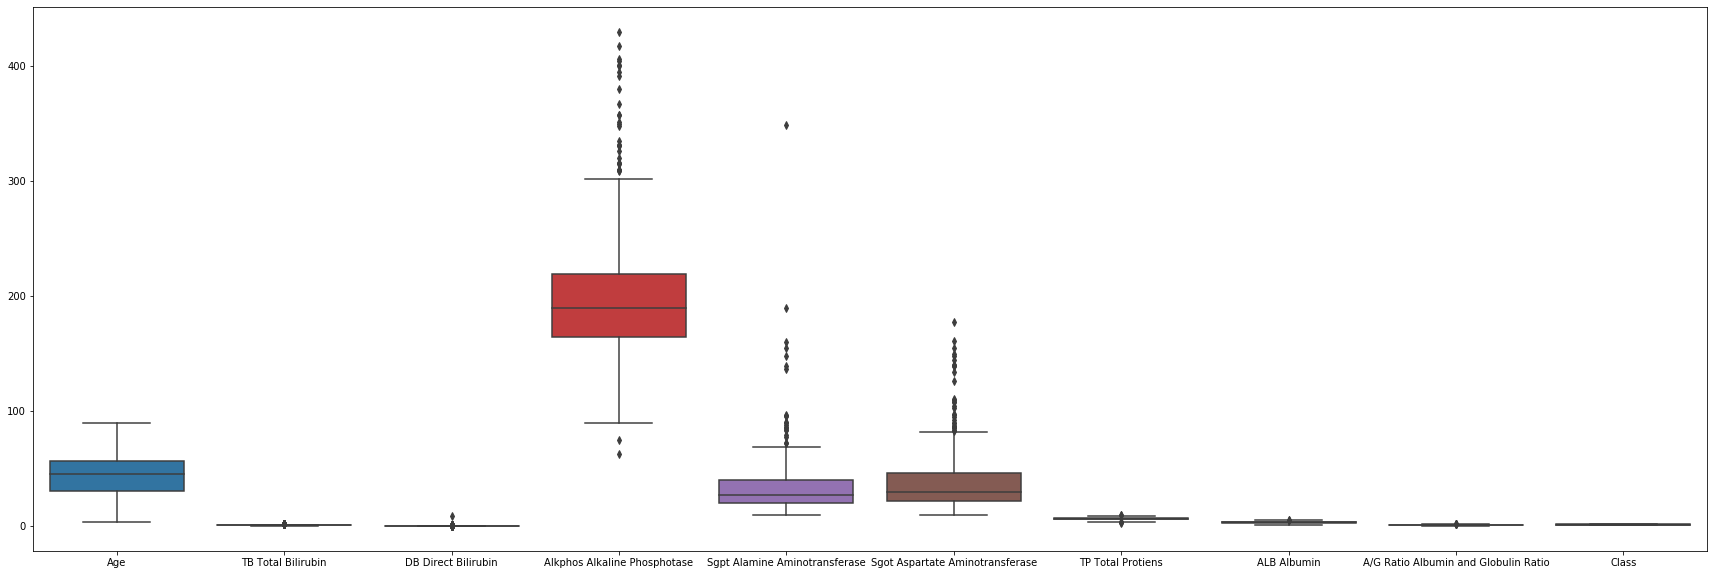

In [62]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df4)

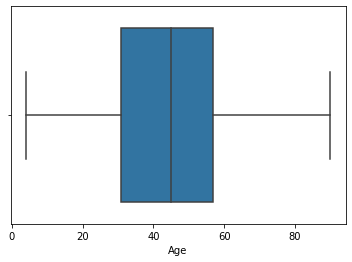

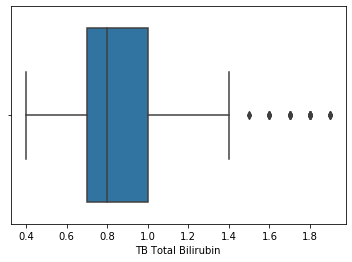

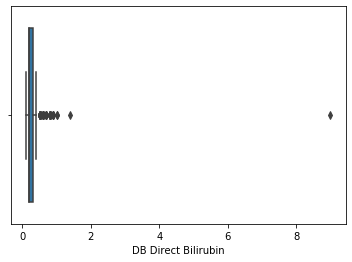

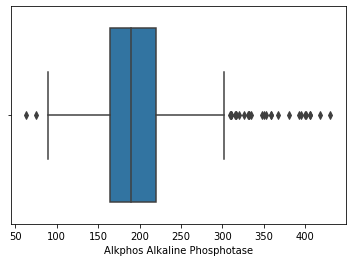

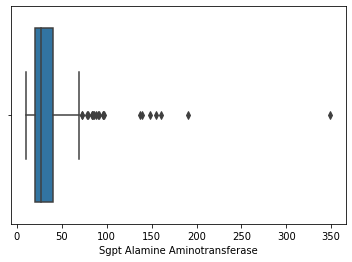

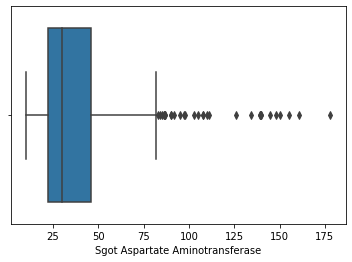

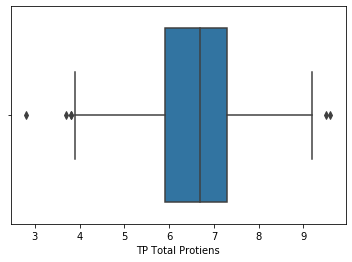

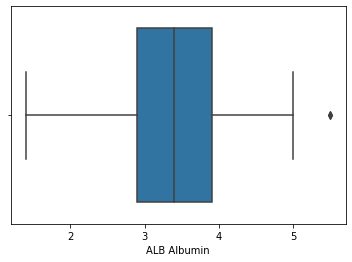

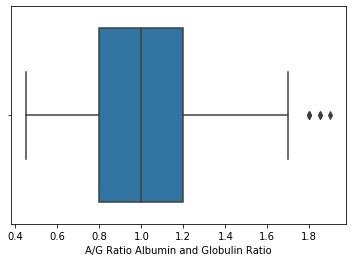

In [63]:
##Data looks fairly clean now:
##We'll check boxplot separately now:

for i in list(df4.dtypes[df4.dtypes!=object].index):
    sns.boxplot(df4[i])
    plt.show()

In [64]:
##We can work on this data now or we can stick to our original data

In [65]:
df.shape

(583, 11)

In [66]:
df['Class'].value_counts(normalize=True)*100

1    71.35506
2    28.64494
Name: Class, dtype: float64

In [67]:
data = df4

In [68]:
data['Class'].value_counts(normalize=True)*100

1    58.659218
2    41.340782
Name: Class, dtype: float64

In [69]:
data.shape

(358, 11)

In [70]:
##We see that on removing the outliers, the percentage of the Classes is changing by a large value and the data is also
#decreasing, so we should proceed with our original data for predictions in this case, since the balance in the class has
#changed after removing outliers, and that could mean that we have loss of data(since anyway the data is less)
#so we will stick with our original dataframe df for further processing

# Checking Target distribution


In [72]:
df['Class'].value_counts(normalize=True)*100

1    71.35506
2    28.64494
Name: Class, dtype: float64

In [73]:
##We see that the minority class has more than 20% presence in the data, and we can accept this because a percentage of
#more than 20 signifies that there is no imbalance. We see that data is fairly balanced based on the business scenario
#at hand

In [74]:
#4. Summarize relationships among variables (10 marks)
#a. Plot relevant categorical plots. Find out which are the variables most correlated or appear to
#be in causation with Target? Do you want to exclude some variables from the model based
#on this analysis? What other actions will you take?

In [75]:
df.head()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Class
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


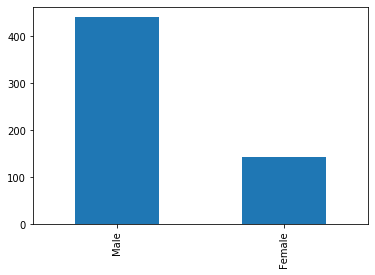

In [76]:
df['Gender'].value_counts().plot.bar()  ##Class presence in data

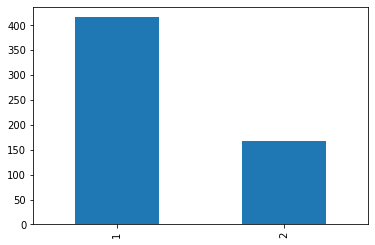

In [77]:
df['Class'].value_counts().plot.bar()  ##Target presence in data

In [78]:
##To check correlation with Target, we will have to convert target to numeric
df['Class'] = df['Class'].astype(int)

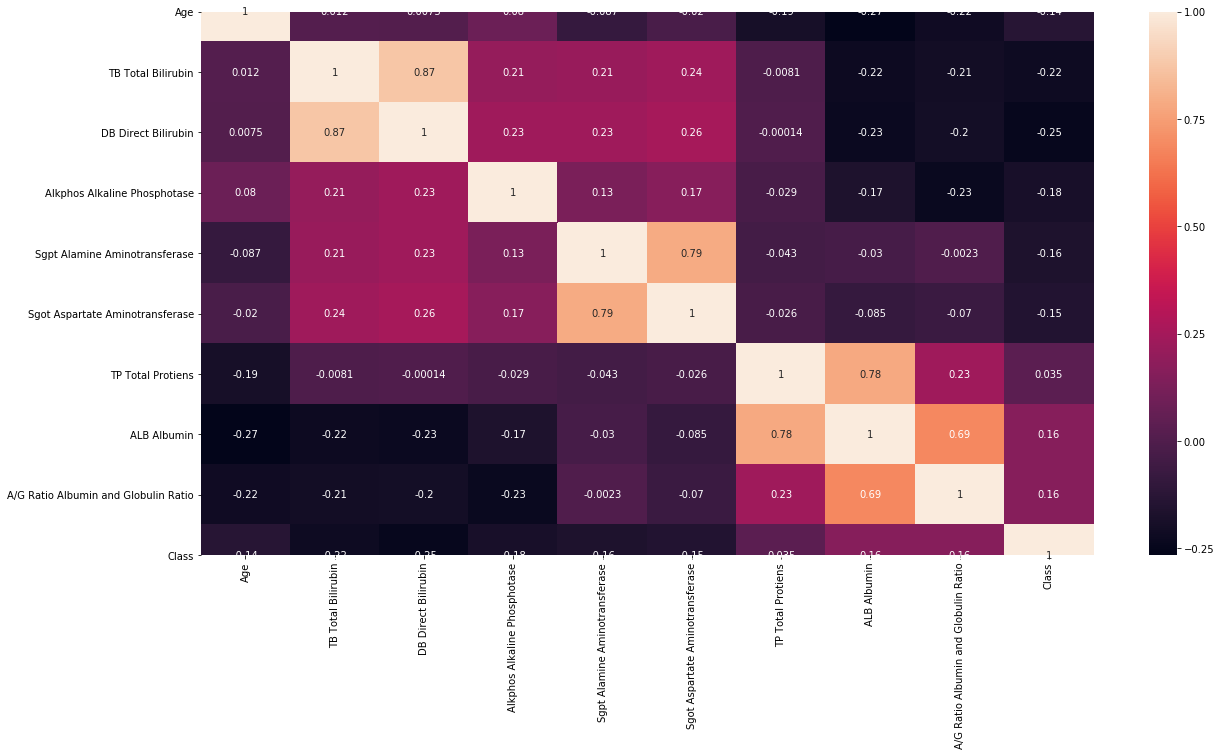

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [80]:
##We see that no variable has much correlation with the Target, so we are okay to proceed
##Let's check scatterplot as well

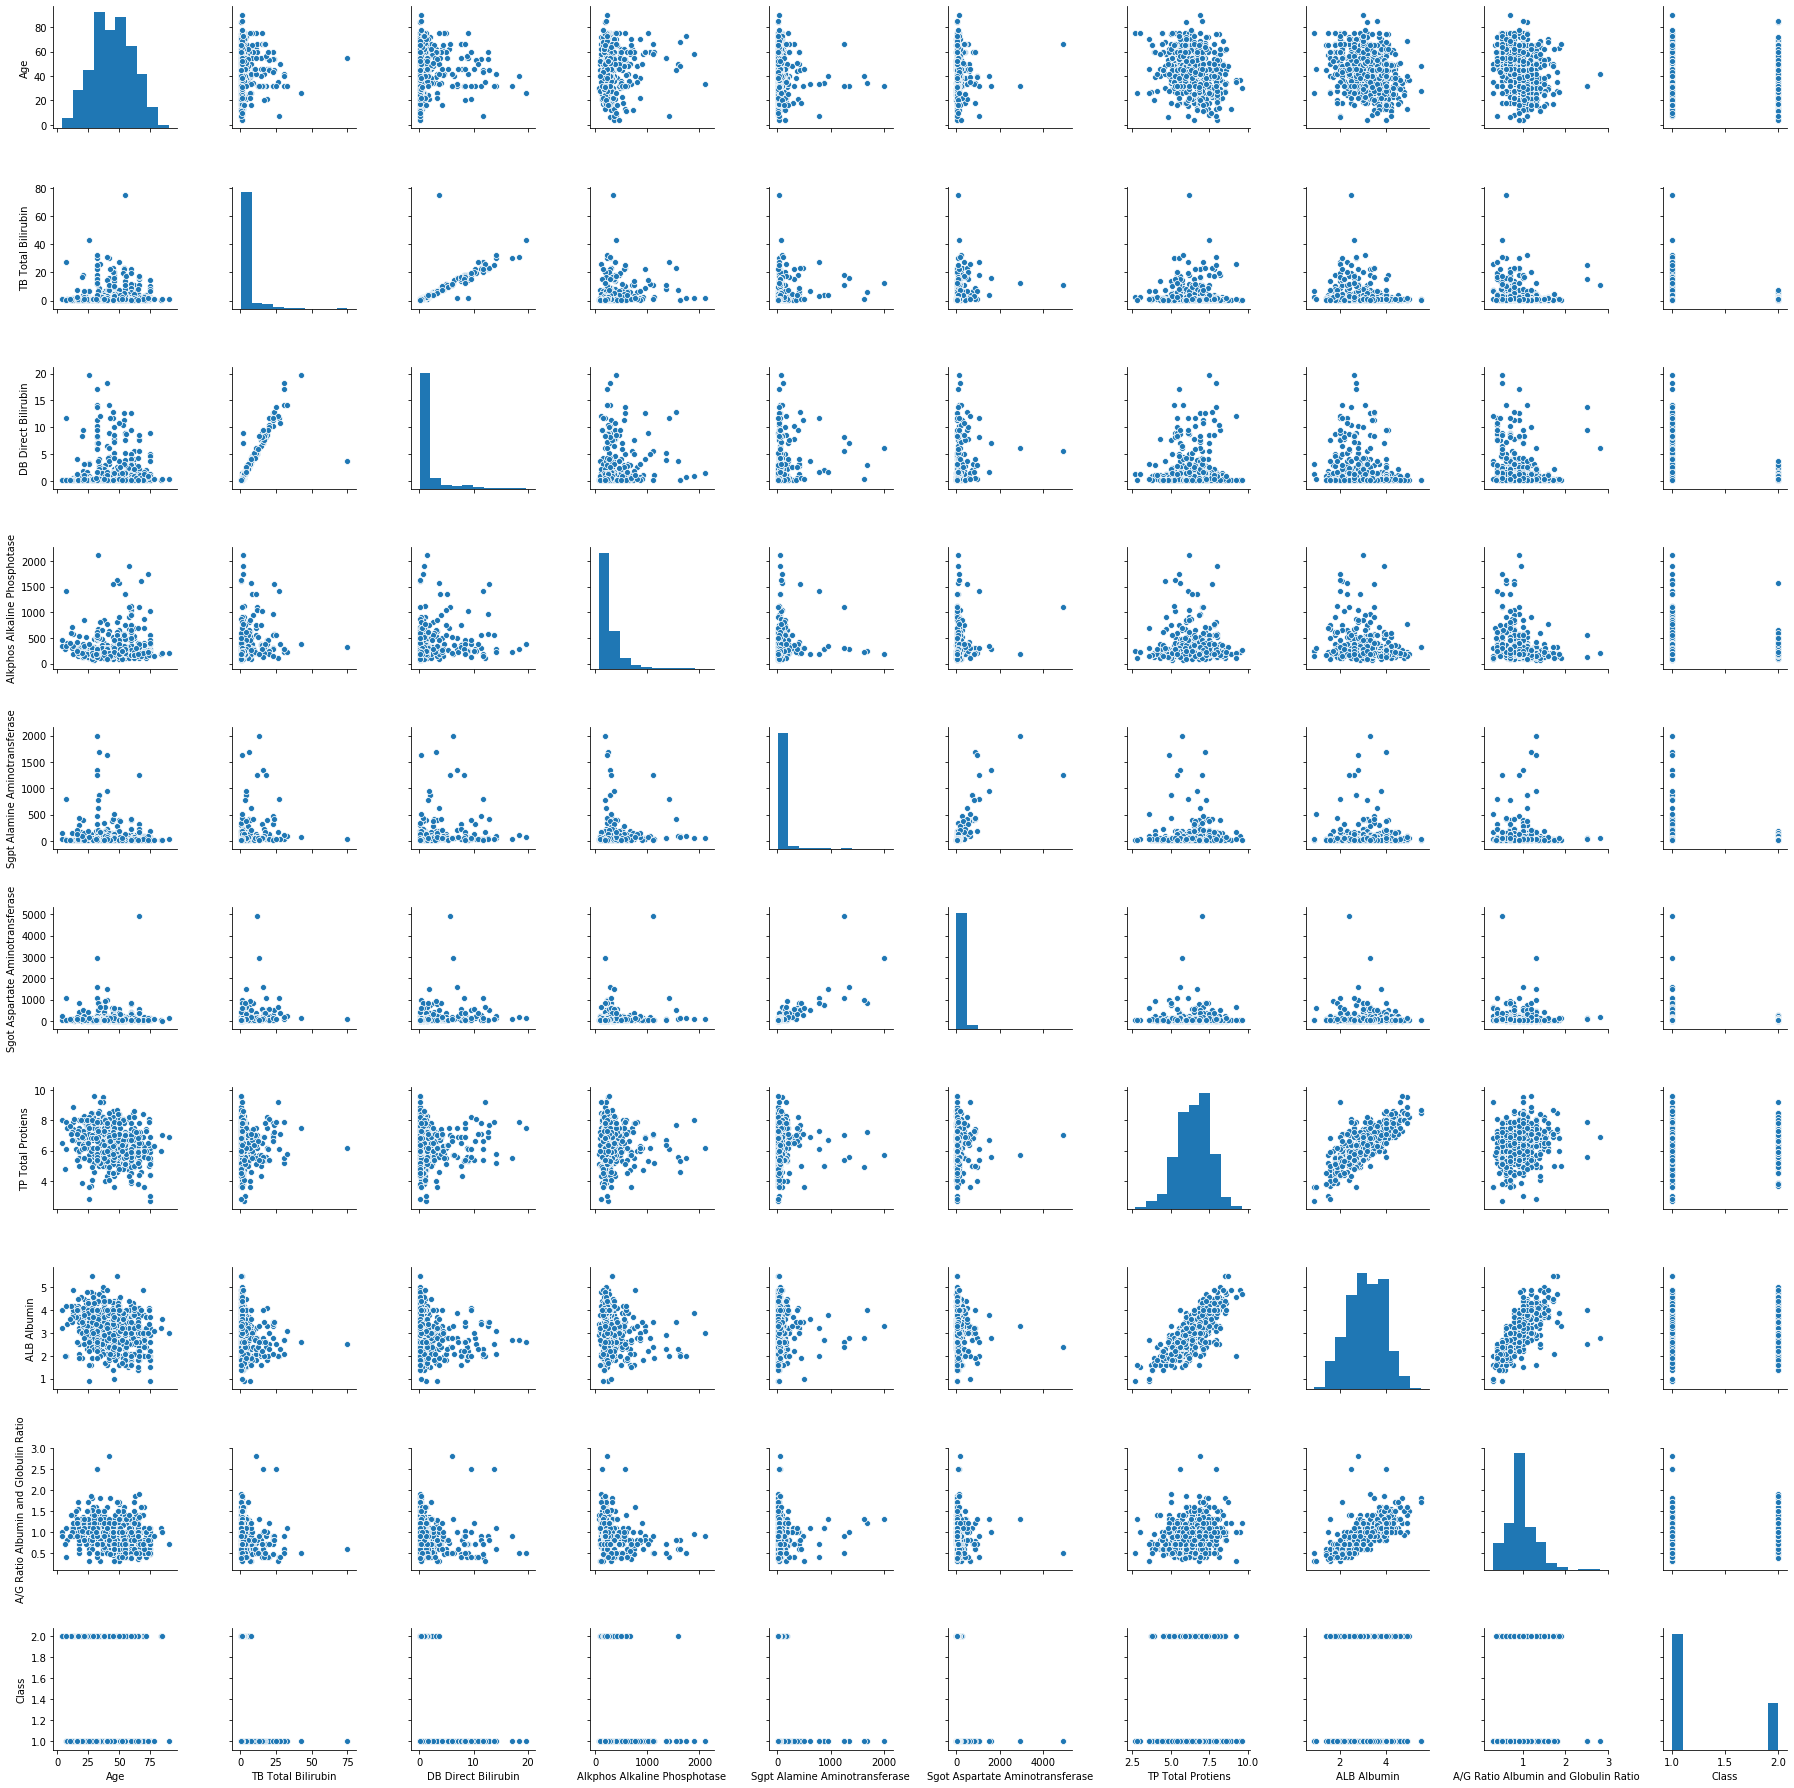

In [81]:
sns.pairplot(data=df)
plt.show()

In [82]:
##As we can see in the last row of the pairplot, that there is no correlation between the Target Class and the independant
#variables. Based on this, we will not exclude any variable

In [83]:
df.columns

Index(['Age', 'Gender', 'TB Total Bilirubin', 'DB Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'TP Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Class'],
      dtype='object')

In [84]:
##Also, we do see some high correlation among independant variables, such as between
##'TB Total Bilirubin' and 'DB Direct Bilirubin'
##AND
##Between 'TP Total Protiens' and  'ALB Albumin'
#and among a few other variables as well
#but at this point, we will not be excluding any variables as we need to check which are the highly important variables
#that our model points towards

In [85]:
##Other actions: We will keep track of these independant variables which are correlated to each other, so that they don't
#affect the accuracy of the model

# Relationship of the Independant variables with the Target

In [87]:
df.dtypes

Age                                       int64
Gender                                   object
TB Total Bilirubin                      float64
DB Direct Bilirubin                     float64
Alkphos Alkaline Phosphotase              int64
Sgpt Alamine Aminotransferase             int64
Sgot Aspartate Aminotransferase           int64
TP Total Protiens                       float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Class                                     int32
dtype: object

In [88]:
list(df.dtypes[df.dtypes!=object].index)

['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio',
 'Class']

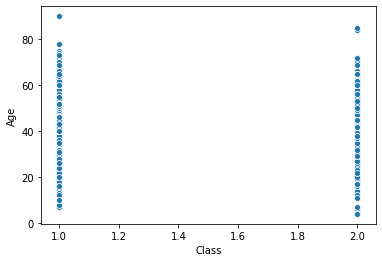

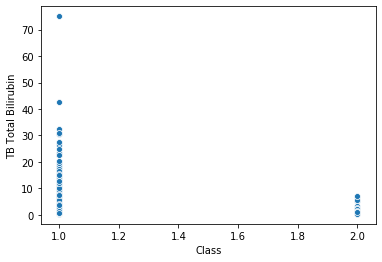

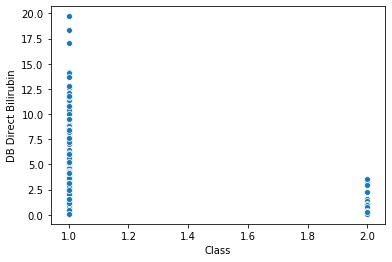

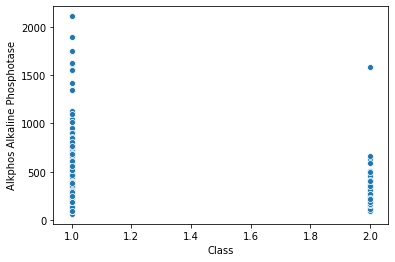

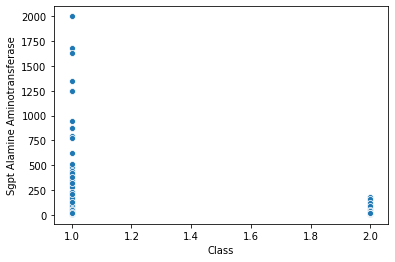

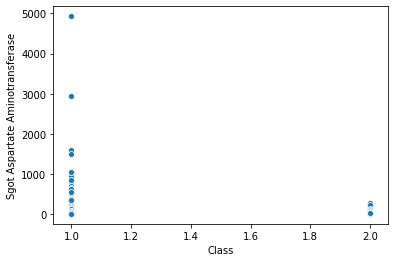

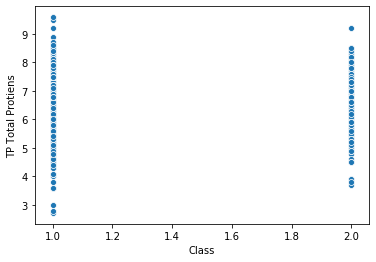

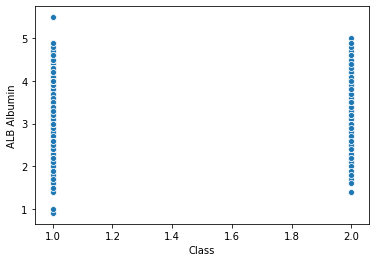

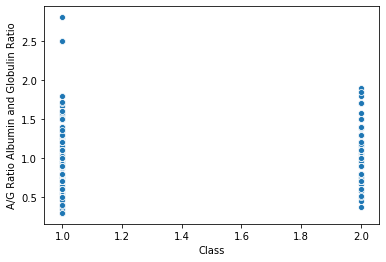

In [89]:
for i in ['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']:
    sns.scatterplot(data=df,x='Class',y=i)
    plt.show()

In [90]:
##Above we can see how quantitative variables scatter with respect to class

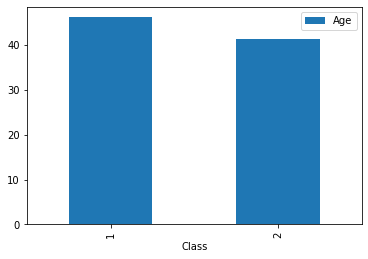

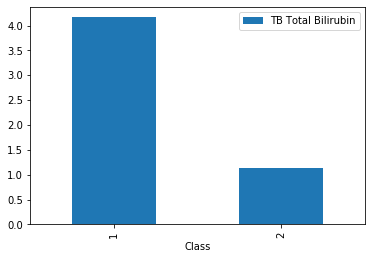

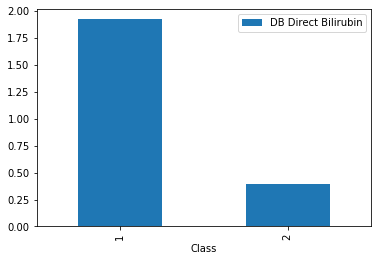

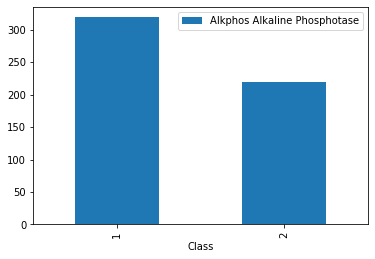

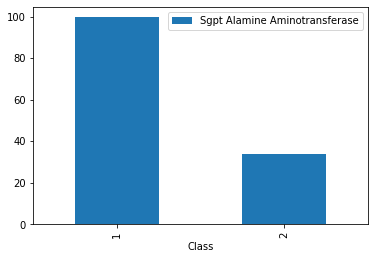

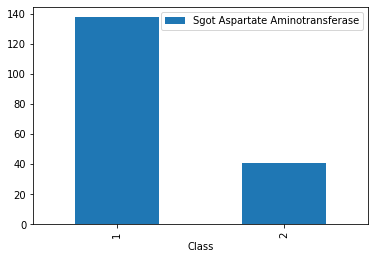

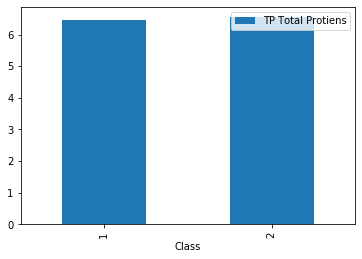

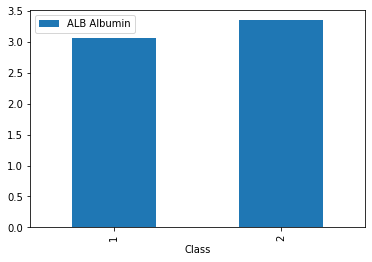

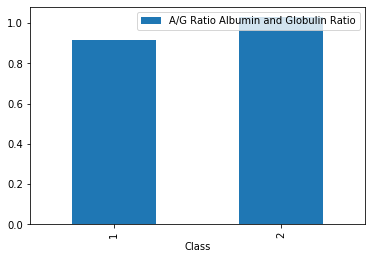

In [91]:
for i in ['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']:
    df.groupby('Class').agg({i:'mean'}).plot.bar()
    plt.show()

In [92]:
##above we can see the mean of each quantitative variable based on Class 

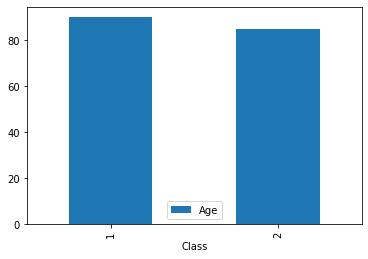

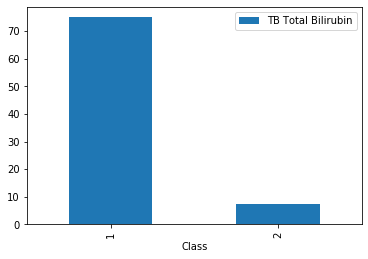

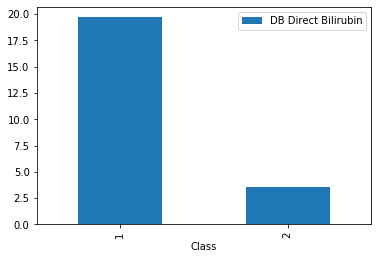

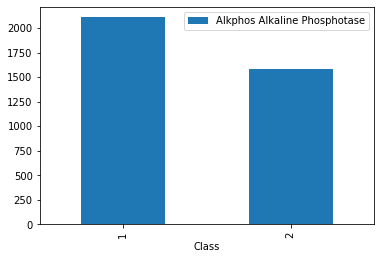

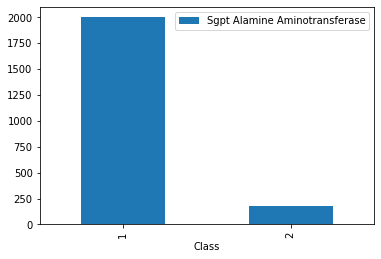

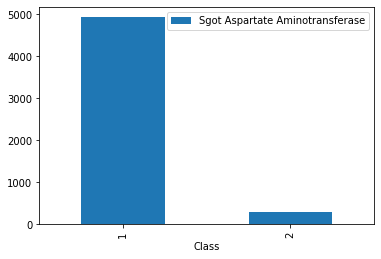

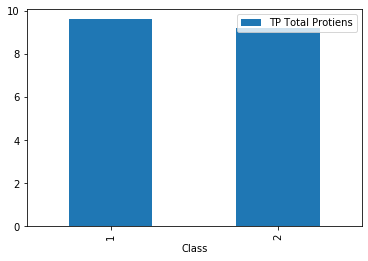

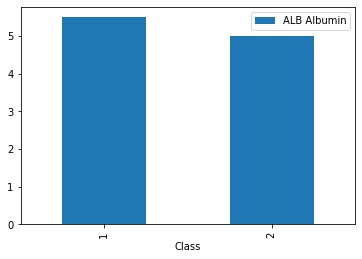

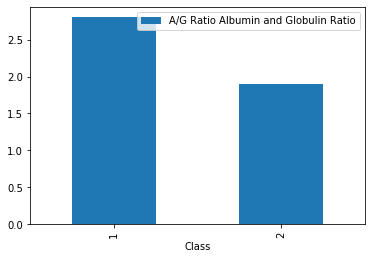

In [93]:
for i in ['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']:
    df.groupby('Class').agg({i:'max'}).plot.bar()
    plt.show()

In [94]:
##above we can see the max of each quantitative variable based on Class 

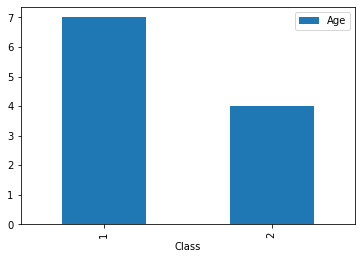

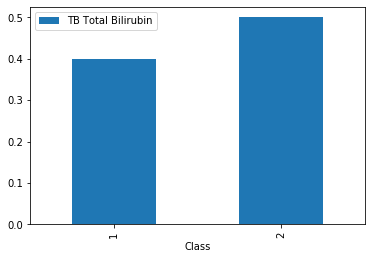

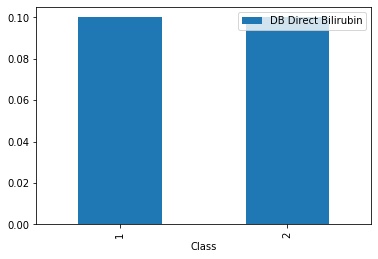

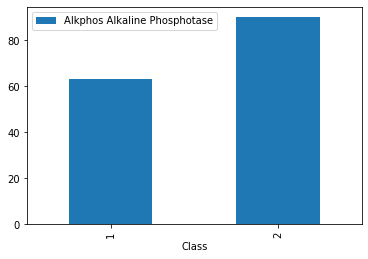

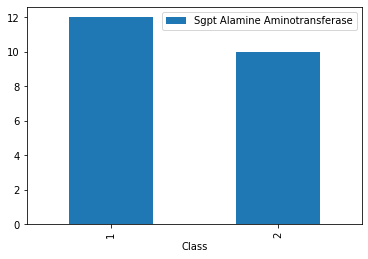

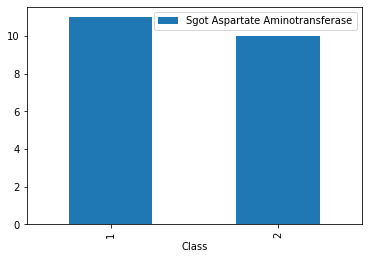

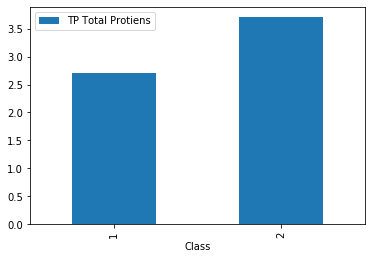

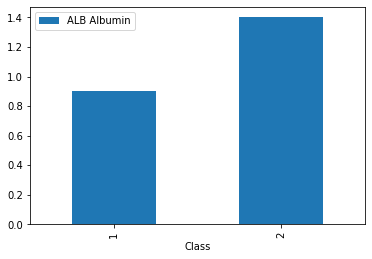

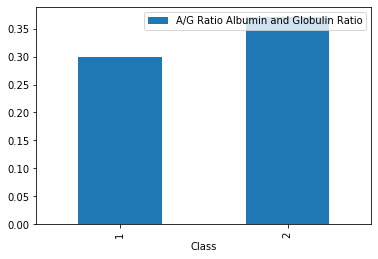

In [95]:
for i in ['Age',
 'TB Total Bilirubin',
 'DB Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'TP Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']:
    df.groupby('Class').agg({i:'min'}).plot.bar()
    plt.show()

In [96]:
##above we can see the min of each quantitative variable based on Class 

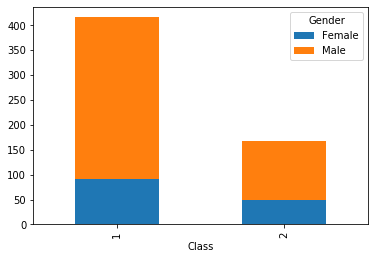

In [97]:
pd.crosstab(df['Class'],df['Gender']).plot.bar(stacked=True)

In [98]:
##We can see that based on the Class, how both Genders are present(in what quantity) in each Class

<function matplotlib.pyplot.show(*args, **kw)>

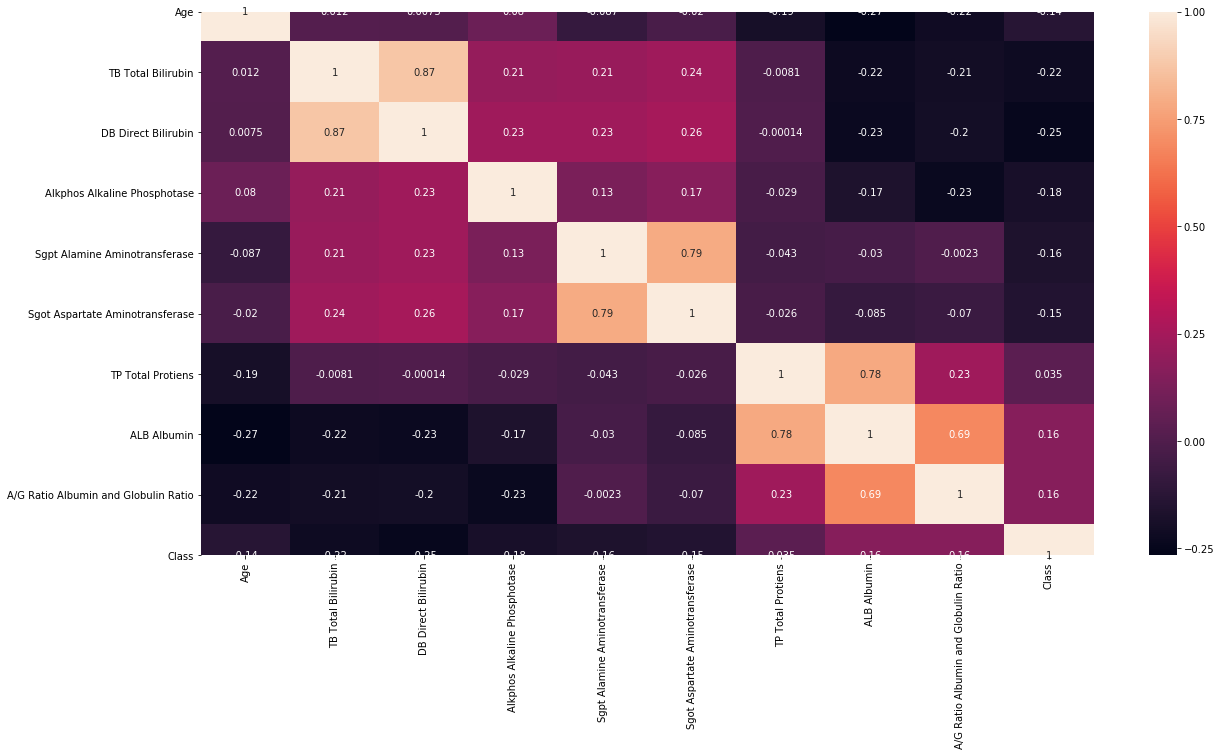

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [100]:
##From the Heatmap, we can see that the independant variables are not much correlated with the Class

In [101]:
df['Class'] = df['Class'].astype(object)

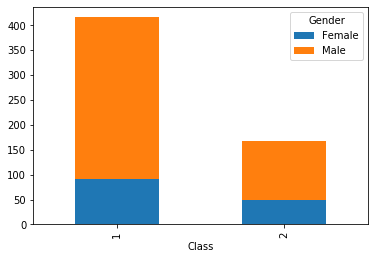

In [102]:
##Checking for Gender:

pd.crosstab(df['Class'],df['Gender']).plot.bar(stacked=True)

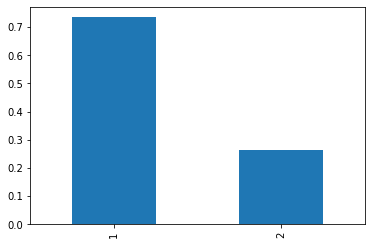

In [103]:
df[(df['Gender']=='Male')]['Class'].value_counts(normalize=True).plot.bar()

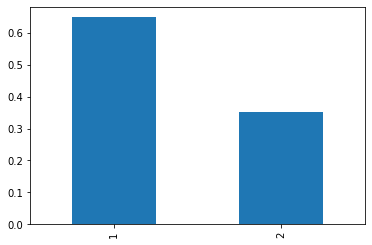

In [104]:
df[(df['Gender']=='Female')]['Class'].value_counts(normalize=True).plot.bar()

In [105]:
##For checking Class separately for male and female, we don't see any imbalance, so we can safely say that Gender is
#not strongly related to the Class

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


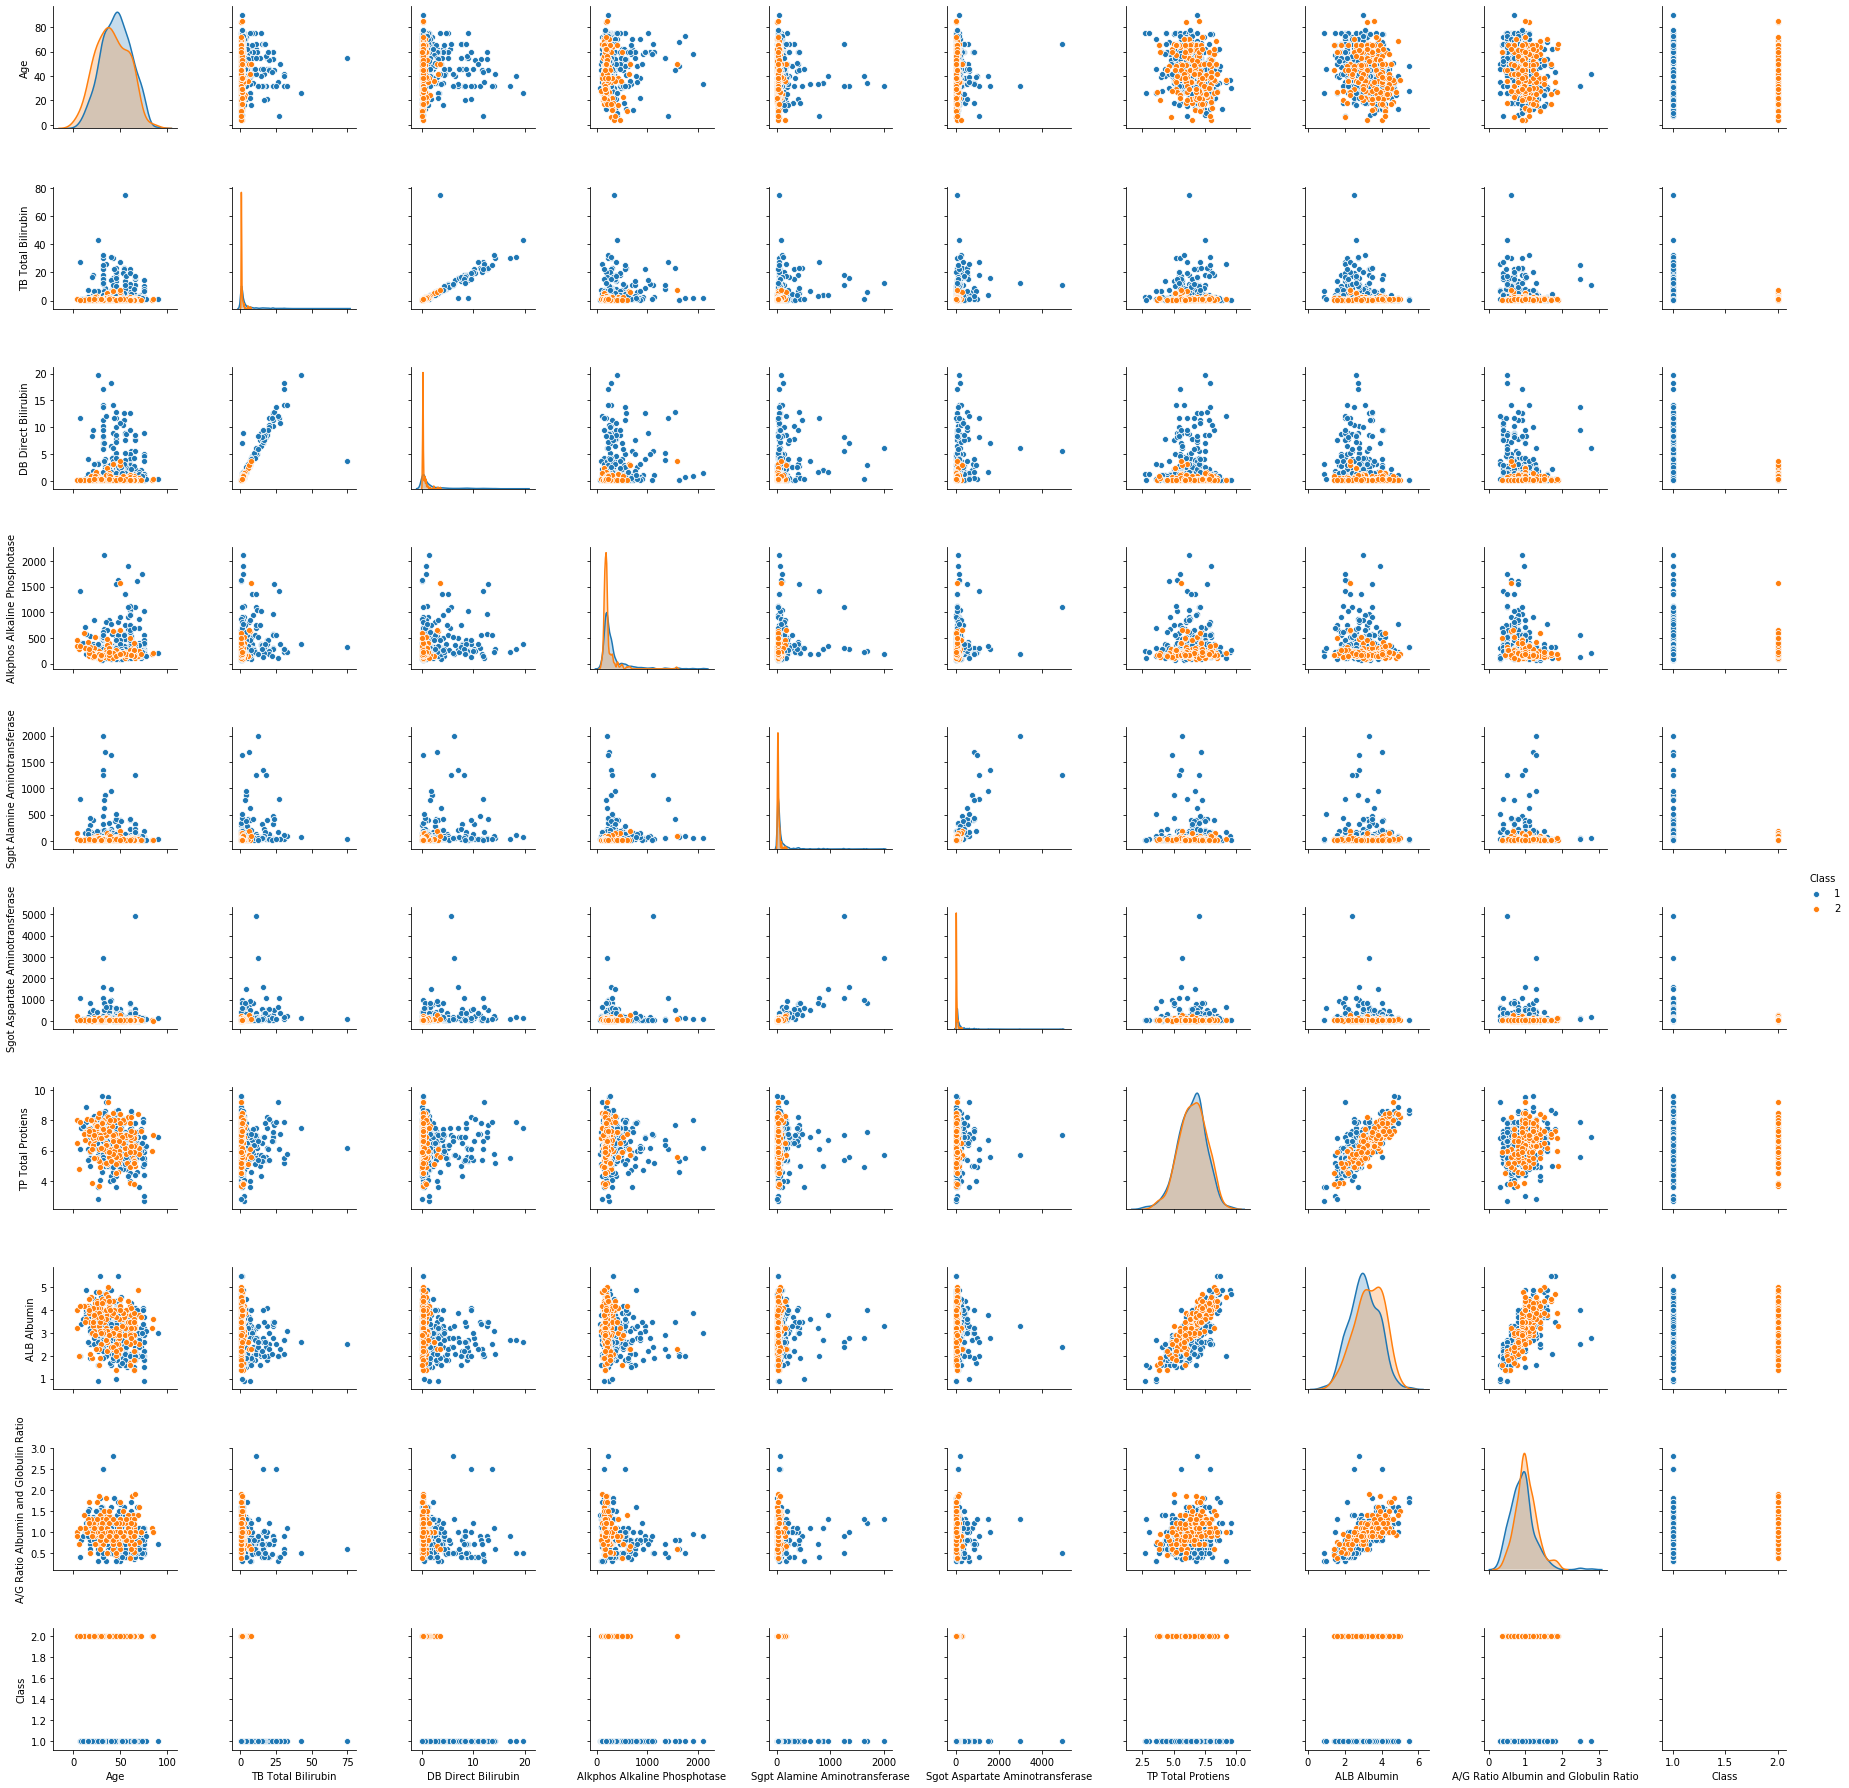

In [106]:
sns.pairplot(data=df,hue='Class')

In [107]:
##Adding Class as hue to the Pairplot, we can notice certain differences where data is different for different Classes
##but we cannot say that any particular independant variable is highly related to Class

# Data Split and Statistical Check for checking if the Sample represents the Population

In [109]:
df['Gender'] = df['Gender'].replace({'Female':1,'Male':0})

In [110]:
df['Gender'].value_counts()

0    441
1    142
Name: Gender, dtype: int64

In [111]:
df['Class'] = df['Class'].astype(int)

In [112]:
X = df.drop(columns='Class')
y = df['Class']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [114]:
##Checking if both train and test representative of the overall data

In [115]:
X.describe()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [116]:
X_train.describe()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,44.607843,0.232843,3.383824,1.470588,288.041667,77.517157,107.477941,6.467157,3.131863,0.949828
std,15.925290,0.423162,6.610161,2.812139,231.694635,172.690260,297.147651,1.086753,0.780168,0.321044
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,12.000000,2.700000,0.900000,0.370000
25%,33.000000,0.000000,0.800000,0.200000,179.000000,23.000000,26.000000,5.775000,2.600000,0.700000
50%,45.000000,0.000000,1.000000,0.300000,211.500000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,56.250000,0.000000,2.600000,1.225000,298.000000,60.000000,85.250000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,4929.000000,9.600000,5.500000,2.800000


In [117]:
X_test.describe()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,45.068571,0.268571,3.100571,1.522286,296.485714,88.165714,115.582857,6.520571,3.165143,0.940229
std,16.832709,0.444488,5.168133,2.807710,267.937093,204.242393,269.492995,1.084599,0.832036,0.313281
min,4.000000,0.000000,0.500000,0.100000,92.000000,11.000000,10.000000,3.600000,0.900000,0.300000
25%,32.000000,0.000000,0.800000,0.200000,165.000000,24.000000,25.000000,5.950000,2.700000,0.700000
50%,46.000000,0.000000,1.000000,0.300000,202.000000,36.000000,41.000000,6.500000,3.100000,0.950000
75%,59.000000,1.000000,2.600000,1.300000,298.000000,63.000000,91.500000,7.200000,3.700000,1.100000
max,85.000000,1.000000,30.500000,17.100000,1750.000000,2000.000000,2946.000000,9.200000,5.500000,1.900000


In [118]:
##We are able to see that the mean data from X, X_test and X_train resemble each other(means are close by to each other, for
#every independant variable,and hence we can claim that train and test are represetative of overall data)

1    0.713551
2    0.286449
Name: Class, dtype: float64


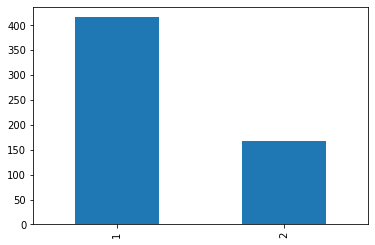

1    0.732843
2    0.267157
Name: Class, dtype: float64


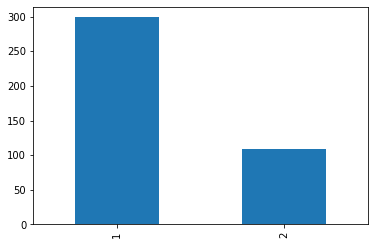

1    0.668571
2    0.331429
Name: Class, dtype: float64


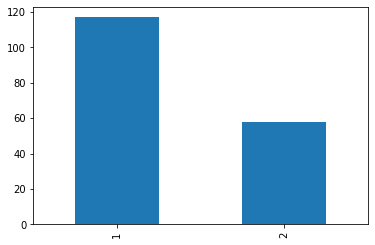

In [119]:
##We can do the same for the target by doing the count
print(y.value_counts(normalize=True))
y.value_counts().plot.bar()
plt.show()
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.bar()
plt.show()
print(y_test.value_counts(normalize=True))
y_test.value_counts().plot.bar()
plt.show()

In [120]:
##We can see that the train and test data fairly represent the overall data, through the plots and the values

In [121]:
#We can also do a ttest for the target:

In [122]:
from scipy.stats import ttest_1samp

In [123]:
#ttest_1samp(sample,pop_mean)

In [124]:
ttest_1samp(y_train,y.mean())

Ttest_1sampResult(statistic=-0.8796256083938537, pvalue=0.37958121876474615)

In [125]:
ttest_1samp(y_test,y.mean())

Ttest_1sampResult(statistic=1.2604255537076234, pvalue=0.20920353716020326)

In [126]:
print('Mean is %2.1f Sd is %2.1f' % (y.mean(),np.std(y,ddof = 1)))

Mean is 1.3 Sd is 0.5


In [127]:
#PValue here is greater than significance level-0.05, so we accept null hypothesis, which means that train data
#and test data does represent the population

# Base Model

In [129]:
df.head()

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Class
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [130]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
def model_compare(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [133]:
logreg = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lgbc = lgb.LGBMClassifier()

In [134]:
model_compare(logreg,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.7450980392156863
Accuracy on Test Set 0.6742857142857143
AUC ROC on Train Set 0.7547789266975545
AUC ROC on Test Set 0.77763041556145


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
model_compare(rfc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.9901960784313726
Accuracy on Test Set 0.68
AUC ROC on Train Set 0.9996318001902366
AUC ROC on Test Set 0.7080017683465959


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [136]:
model_compare(dt,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.6342857142857142
AUC ROC on Train Set 1.0
AUC ROC on Test Set 0.5699970527556735


In [137]:
model_compare(knn,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.7818627450980392
Accuracy on Test Set 0.6628571428571428
AUC ROC on Train Set 0.8318247368905527
AUC ROC on Test Set 0.7270114942528736


In [138]:
model_compare(lgbc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.6914285714285714
AUC ROC on Train Set 1.0
AUC ROC on Test Set 0.7711464780430297


In [139]:
##From above, we can see that K-Nearest Neighbors is giving quite good results on Accuracy as well as AUC ROC as well
##But, since we know that a Decision Tree is good for understanding the variables, let us try building a decision
#tree based on certain assigned values

In [140]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state = 10,max_depth=4, min_samples_leaf=7)

In [141]:
model_compare(dt1,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.7598039215686274
Accuracy on Test Set 0.6571428571428571
AUC ROC on Train Set 0.8228958915037894
AUC ROC on Test Set 0.7217064544650752


In [142]:
##So, now we see that the decision tree is actually giving a good accuracy and it can be tuned and visualized while
#understanding the variables, so we choose Decision Tree as the base model

# Accuracy Check

In [144]:
#Accuracy on Train Set 0.7598039215686274
#Accuracy on Test Set 0.6571428571428571

##Overall accuracy is good, since we can see that values for Test and train are not far apart. Also, the accuracy is
#above 0.65 for both, so it is highly possible to tune it going further, to obtain the perfect depth, min_samples_leaf
#and other parameters.
##It is safe to say that the accuracy is good at this moment, based on the business problem defined, but accuracy 
#can be improved further

# Precision, Recall, F1 Score: The more important metrics

In [146]:
def model(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))
    print('\n\n')
    print('Classification Report for test','\n\n',classification_report(ytest,ypred_test))
    print('\n\n')
    print('Classification Report for train','\n\n',classification_report(ytrain,ypred_train))

In [147]:
model(dt1,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.7598039215686274
Accuracy on Test Set 0.6571428571428571
AUC ROC on Train Set 0.8228958915037894
AUC ROC on Test Set 0.7217064544650752



Classification Report for test 

               precision    recall  f1-score   support

           1       0.67      0.97      0.79       117
           2       0.25      0.02      0.03        58

    accuracy                           0.66       175
   macro avg       0.46      0.50      0.41       175
weighted avg       0.53      0.66      0.54       175




Classification Report for train 

               precision    recall  f1-score   support

           1       0.76      0.99      0.86       299
           2       0.79      0.14      0.23       109

    accuracy                           0.76       408
   macro avg       0.77      0.56      0.55       408
weighted avg       0.77      0.76      0.69       408



In [148]:
##For our Decision Tree above, we can see Classification Report for the Test:

#Values when recorded:
#Precision for 1:0.67
#Recall for 1:0.97
#F1 Score for 1:0.79

##similarly we can see above for Class 2 as well
#Optimization can be done by improving the Precision and Recall, which are the deciding factors of how well the 
#classification is working, and an insight into how and where the model is making correct predictions and where it is making
#wrong ones

# Significant Variables

In [ ]:
!pip install pydotplus

In [150]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


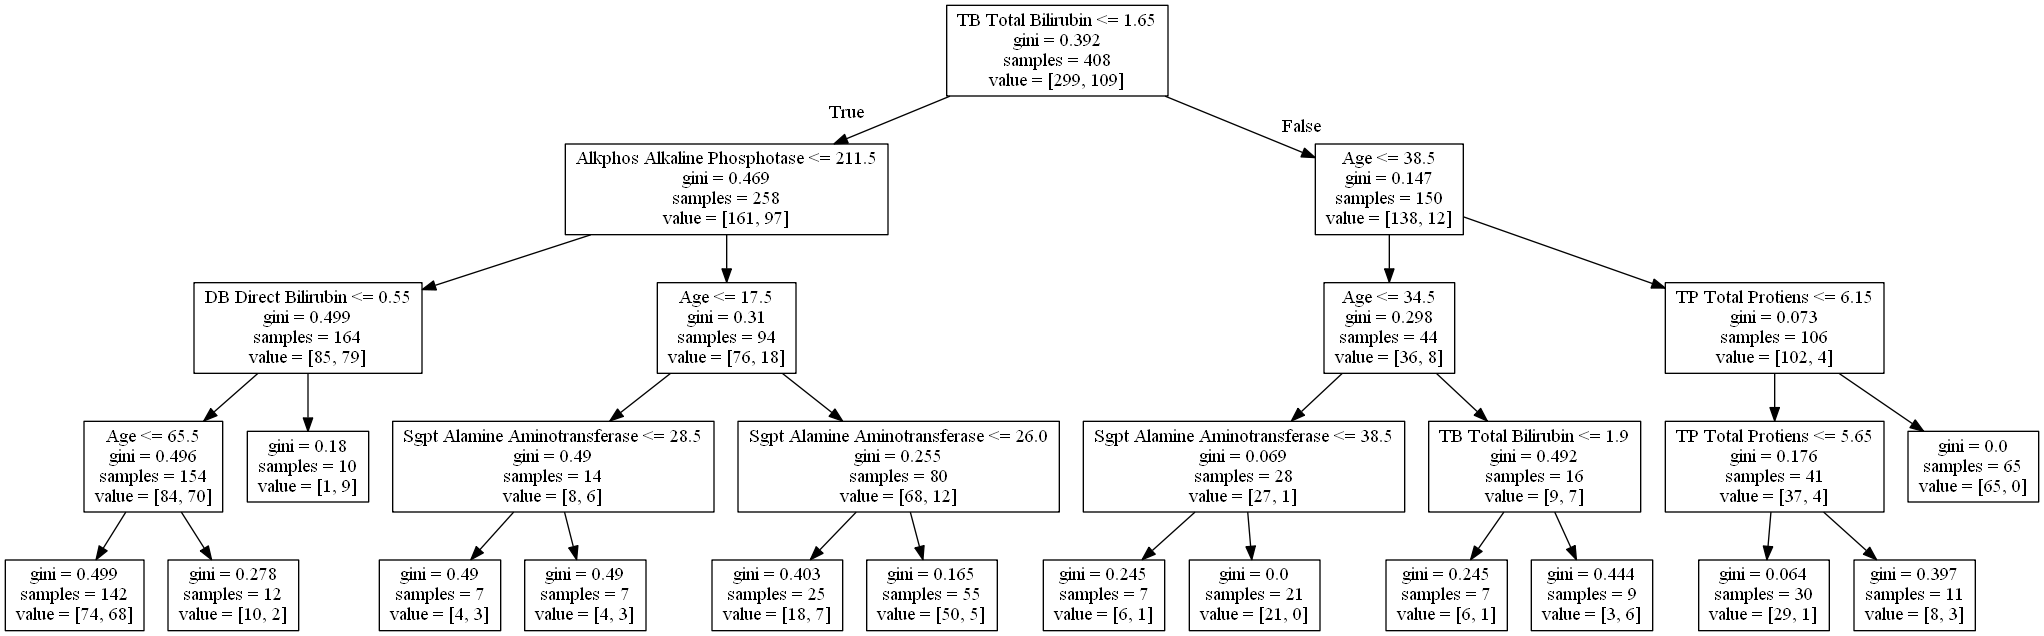

In [151]:
features = X.columns
dot_data = export_graphviz(dt1,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [152]:
X.columns

Index(['Age', 'Gender', 'TB Total Bilirubin', 'DB Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'TP Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')

In [153]:
##To understand the important features, we will have to look at the decision tree:

#'TB Total Bilirubin' is the first deciding factor at 1.65, which signifies that it is the most important variable
##Next comes 'Alkphos Alkaline Phosphotase' and 'Age', based on which direction we move towards, after starting from 
#'TB Total Bilirubin'. 
##so, 'Alkphos Alkaline Phosphotase' and 'Age' are the next important features.
##simlarly we can keep moving down the tree to understand that which features are important, and at what significant point in
#data, they are important.

##Data when recorded:
##some examples:
##after choosing importance of 'TB Total Bilirubin' at 1.65
##Next we have following variables in tree
##Age at 38.5 'TB Total Bilirubin' <= 1.65
##'Alkphos Alkaline Phosphotase' at 211.5 and 'TB Total Bilirubin' > 1.65


##similarly, we can keep moving down the tree to understand iterations and how and at which point which variables become
#important.

##for a broad classification: we can take a few variables are consider them as important in the data:


##AS per above decision tree, these are the deciding variables:
#'TB Total Bilirubin'
#'Alkphos Alkaline Phosphotase'
#'Age'
#'TP Total Protiens'
#'DB Direct Bilirubin'
#'Sgpt Alamine Aminotransferase'

# Model Output Parameters of Importance

In [160]:
#Let's look at all the parameters together and we will include the Confusion Matrix as well

In [161]:
def model(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))
    print('\n\n')
    print('Classification Report for test','\n\n',classification_report(ytest,ypred_test))
    print('\n\n')
    print('Classification Report for train','\n\n',classification_report(ytrain,ypred_train))
    print('\n\n')
    print('Confusion Matrix for test:','\n\n', confusion_matrix(ytest,ypred_test))
    sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True)
    plt.show()

Accuracy on Train Set 0.7598039215686274
Accuracy on Test Set 0.6571428571428571
AUC ROC on Train Set 0.8228958915037894
AUC ROC on Test Set 0.7217064544650752



Classification Report for test 

               precision    recall  f1-score   support

           1       0.67      0.97      0.79       117
           2       0.25      0.02      0.03        58

    accuracy                           0.66       175
   macro avg       0.46      0.50      0.41       175
weighted avg       0.53      0.66      0.54       175




Classification Report for train 

               precision    recall  f1-score   support

           1       0.76      0.99      0.86       299
           2       0.79      0.14      0.23       109

    accuracy                           0.76       408
   macro avg       0.77      0.56      0.55       408
weighted avg       0.77      0.76      0.69       408




Confusion Matrix for test: 

 [[114   3]
 [ 57   1]]


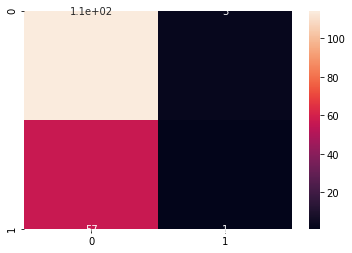

In [162]:
model(dt1,X_train,X_test,y_train,y_test)

In [163]:
##Using the confusion matrix and the Heatmap, we can see that the values of Correct Predictions are more than the
#values of wrong predictions and the classification report shows us the Precision, Recall and F1 score
##Recall is quite high, and we want to increase the value of Precision also, moving further into model building

# Improvement in Accuracy

In [165]:
##To, improve the Accuracy of the model, we will try to find out the best suitable parameters for our Decision Tree,
#by using GridSearchCV and RandomizedSearchCV techniques, which will help us in finding best suitable parameters

# Hyperparameter Tuning--Grid Search

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [168]:
dt2 = DecisionTreeClassifier()
params  = {'max_depth' : [2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt2,param_grid=params,cv=3)

gsearch.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [169]:
gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [170]:
##For Grid search we consider max_depth between 2 to 8, minimum samples split between 2 to 10
#and min samples leaf between 1 to 10, and we obatined the perfect combination above.

In [171]:
##No we will build decision tree using these hyperparameters

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [174]:

dt2 = DecisionTreeClassifier(**gsearch.best_params_)

dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [175]:
y_pred = dt2.predict(X_test)
y_prob = dt2.predict_proba(X_test)[:,1]
y_pred_train = dt2.predict(X_train)
y_prob_train = dt2.predict_proba(X_train)[:,1]

In [176]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [177]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.7028571428571428
Accuracy of Decision Tree on Train 0.7401960784313726


In [178]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.7045675413022352
ROC AUC train 0.8015049678550555


In [179]:
##We can see that we have been able to bring the test score to a higher level(it was around 0.65 before), 
#and we can see that the train score has almost
#remained the same(it was around 0.75 earlier)

#let's check other metrics as well

Accuracy on Train Set 0.7401960784313726
Accuracy on Test Set 0.7028571428571428
AUC ROC on Train Set 0.8015049678550555
AUC ROC on Test Set 0.7045675413022352



Classification Report for test 

               precision    recall  f1-score   support

           1       0.72      0.95      0.82       126
           2       0.33      0.06      0.10        49

    accuracy                           0.70       175
   macro avg       0.53      0.51      0.46       175
weighted avg       0.61      0.70      0.62       175




Classification Report for train 

               precision    recall  f1-score   support

           1       0.74      0.99      0.84       290
           2       0.83      0.13      0.22       118

    accuracy                           0.74       408
   macro avg       0.78      0.56      0.53       408
weighted avg       0.76      0.74      0.66       408




Confusion Matrix for test: 

 [[120   6]
 [ 46   3]]


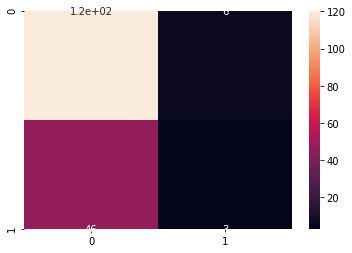

In [180]:
model(dt2,X_train,X_test,y_train,y_test)

In [181]:
##so, we see that precision and F1-score have increased for both Classes if we compare it with earlier 
#(initial) model, and the 
#F1-score for class 1 has decreased a bit, but the change is not so much (from 0.97 to 0.95-which is also a good value)

# Hyperparamter tuning--Random SearchCV

In [183]:
from scipy.stats import randint as sp_randint

dt3 = DecisionTreeClassifier(random_state=1)

params  = {'max_depth' : sp_randint(2,10),
    'min_samples_split':sp_randint(2,50),
    'min_samples_leaf':sp_randint(1,20),'criterion':['gini','entropy']}

rand_search = RandomizedSearchCV(dt3,param_distributions=params,cv=3,random_state=1)

rand_search.fit(X,y)


print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 3}


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [186]:

dt3 = DecisionTreeClassifier(**rand_search.best_params_)

dt3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [187]:
y_pred = dt3.predict(X_test)
y_prob = dt3.predict_proba(X_test)[:,1]
y_pred_train = dt3.predict(X_train)
y_prob_train = dt3.predict_proba(X_train)[:,1]

In [188]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [189]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.72
Accuracy of Decision Tree on Train 0.7107843137254902


In [190]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.6931486880466472
ROC AUC train 0.733270017533606


In [191]:
##Accuracy of the tree on Test has again increased, and decreased a bit for the train, which is a good sign if
#the model was initially overfitting on train data.
##let's see all metrics

Accuracy on Train Set 0.7107843137254902
Accuracy on Test Set 0.72
AUC ROC on Train Set 0.733270017533606
AUC ROC on Test Set 0.6931486880466472



Classification Report for test 

               precision    recall  f1-score   support

           1       0.72      1.00      0.84       126
           2       0.00      0.00      0.00        49

    accuracy                           0.72       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.52      0.72      0.60       175




Classification Report for train 

               precision    recall  f1-score   support

           1       0.71      1.00      0.83       290
           2       0.00      0.00      0.00       118

    accuracy                           0.71       408
   macro avg       0.36      0.50      0.42       408
weighted avg       0.51      0.71      0.59       408




Confusion Matrix for test: 

 [[126   0]
 [ 49   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


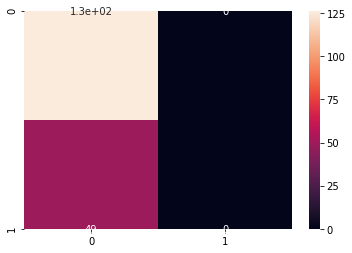

In [192]:
model(dt3,X_train,X_test,y_train,y_test)

In [193]:
##For the above tree, on comparing it with dt2(which we got through GridSearchCV): for above tree, for test:
#precision has remained same and Recall and F1 score have increased for Class 1, but we see that this model is not
#representing Class 2 at all since the Precision, Recall and F1 score is 0
##Accuracy for train and test are close by, which is a good sign for the fit of the model(this shows that train and test data
##were carefully chosen to make predictions)
##If we compare this model with our initial model, we can see that there has been a jump in Precision, Recall, F1 score
#and the Accuracy of the Test as well, for the Class 1 only.
##If we get some data with Class 2, this model won't be able to perform

In [194]:
##But then again, we also see the confusion matrix, and find that the Negatives(or the other class) was not predicted
#at all, so this model will create a bias, when that class comes in the data randomly
##so, because of this reason we won't be choosing this model as the final one

In [195]:
##WE will choose the model that we got through GridSearchCV, as it had seen a jump in Precision, F1 score and Accuracy of
#test when compared to initial model, and the Recall had almost remained close to the initial Recall.
##so we will be choosing dt2(model from GridSearchCV) as final model

# Summary

Accuracy on Train Set 0.7401960784313726
Accuracy on Test Set 0.7028571428571428
AUC ROC on Train Set 0.8015049678550555
AUC ROC on Test Set 0.7045675413022352



Classification Report for test 

               precision    recall  f1-score   support

           1       0.72      0.95      0.82       126
           2       0.33      0.06      0.10        49

    accuracy                           0.70       175
   macro avg       0.53      0.51      0.46       175
weighted avg       0.61      0.70      0.62       175




Classification Report for train 

               precision    recall  f1-score   support

           1       0.74      0.99      0.84       290
           2       0.83      0.13      0.22       118

    accuracy                           0.74       408
   macro avg       0.78      0.56      0.53       408
weighted avg       0.76      0.74      0.66       408




Confusion Matrix for test: 

 [[120   6]
 [ 46   3]]


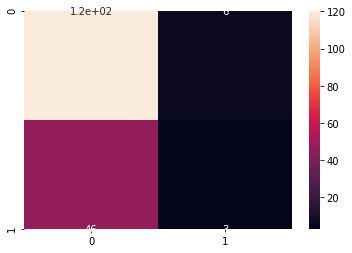

In [197]:
model(dt2,X_train,X_test,y_train,y_test)

In [198]:
##Accuracy on Train Set 0.7401960784313726
#Accuracy on Test Set 0.7028571428571428
#we see that the accuracy of the train and test sets are close by, which shows that there was almost no overfitting in our model
#as it can predict the train and test data with almost equal accuracy
##Accuarcy seems to be good based on our business problem at hand

##For our final model, the Precision, Recall and F1 score has increased for Class 2, from the initial model
#for the Class 1, Precision and F1 score have increased, whereas Recall has remained almost the same (0.97 to 0.95-final model)
#This model is good since it has improve the test accuracy on comparing with the initial model, and the train accuracy has 
#remained almost the same, just decreased by a bit, which shows that a little overfit would have been removed
#overall, for a real world scenario, Model should predict well since we have tuned it and increased the Precision, Recall(almost
#same for Class 1), #as well as the Test accuracy

# Interpretation for Business Stakeholders

In [200]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [201]:
X.columns

Index(['Age', 'Gender', 'TB Total Bilirubin', 'DB Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'TP Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')

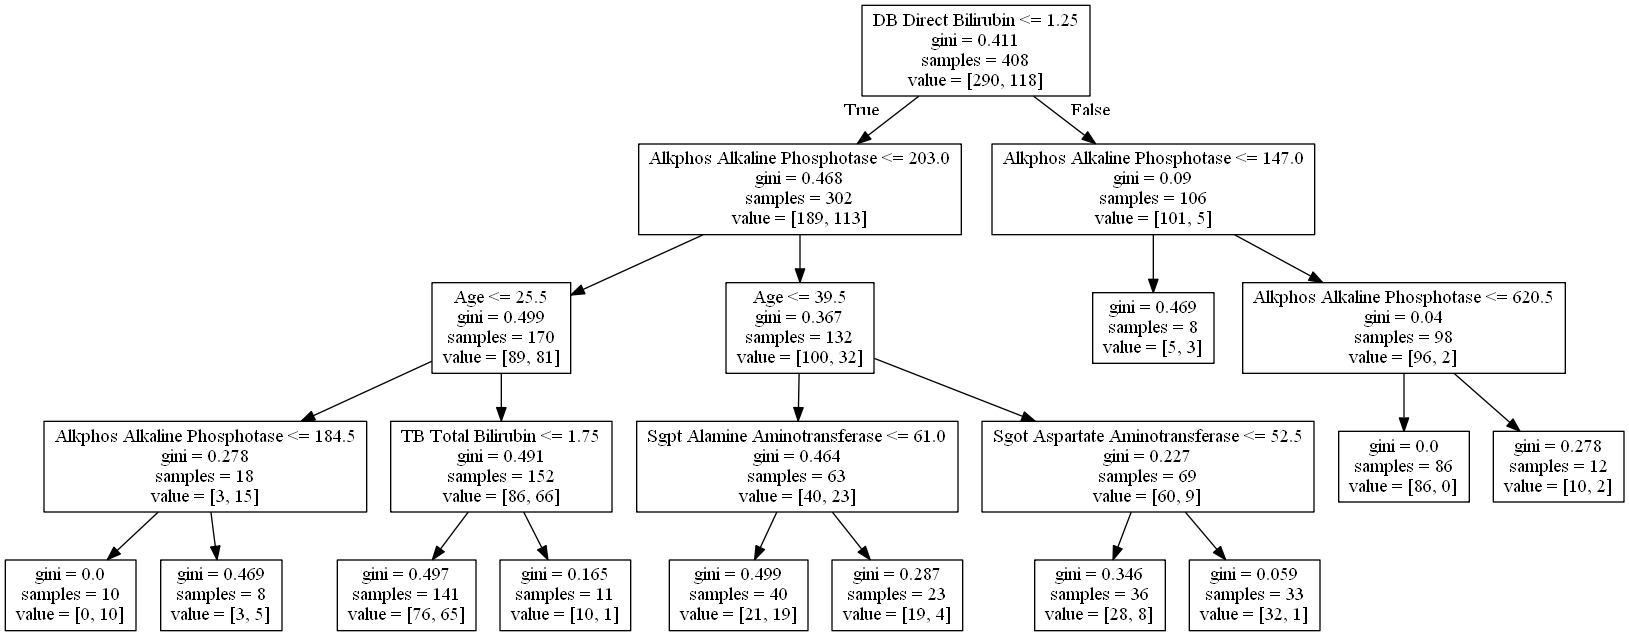

In [202]:
features = X.columns
dot_data = export_graphviz(dt2,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [203]:
##We have to classify patients as Liver Patient or not.
##The first criteria for Classifying them will be whether they have 'DB Direct Bilirubin' <=1.25 :
##If yes, the next criteria for classifying people will be if  'Alkphos Alkaline Phosphotase' <=203.0
##If No, the next criteria will be 'Alkphos Alkaline Phosphotase' <=147

##IF 'DB Direct Bilirubin' <=1.25 and 'Alkphos Alkaline Phosphotase' <=203.0: then we have to check if Age<=25.5
##Else if 'DB Direct Bilirubin' <=1.25 and 'Alkphos Alkaline Phosphotase' >203.0: then we have to check if Age<=39.5

##similarly, we can keep moving down the tree, to understand how the classification is working and diving groups of people
##in bands based on these variables:
##We can see the following variables are of importance:

#Variables and what they mean:
#'DB Direct Bilirubin':direct levels of bilirubin in blood
#'Alkphos Alkaline Phosphotase': alkaline phosphatase (ALP) 
#'Age'
#'Sgot Aspartate Aminotransferase':Alanine aminotransferase (ALT) test
#'TB Total Bilirubin': total levels of bilirubin in blood

##so, from above, we can see that first the model checks the level of bilirubin in your blood, which can show different
#liver problems, and then it checks for ALP, which is used to check the amount of the enzyme in your blood
#and help in diagosing a liver disease or a bone disorder. Then the algorithm can also check for you Age. Then ALT is the 
#test which is done to check how much damaged the Liver is, so of course it is important. Then again, the total amount of 
#bilirubin is of course important,since the direct amount was also important for classifying.

In [204]:
##We also see that variables such as Gender, 'TP Total Protiens', 'ALB Albumin', etc. are not that important
#for classification into Liver Disease or not. Of course, they might be useful in the overall model, but their importance
#will be less

# How was the model performance improved?

In [206]:
##Using GridSearchCV, where certain values were defined for min_samples_leaf, max_depth and min_samples_split to check
#which works best together, was used to find out the optimal parameters for our tree to perform well 
##So, changes were made in these three parameters, so that the tree fits suitably as per our requirement

##this tuning, helped us increase Precision, Recall (for Class 1 it was almost the same, just decreased by 0.02), F1 score
# and test accuracy.
#train accuracy came down by just a little which shows us that the little overfit that was present, was probably removed

# End notes

In [208]:
##Risk to the result and interpretation:

##1. It is possible that through another tuning method, or by changing the parameters to tune it again, we might find that
#some other variables which were not important here, gain some importance in the tree(if constructed)

##2. It is also possible that by using more advanced methods, the tree can be tuned more and then we can obtain an even
#higher accuracy score, but we should keep in mind that along with the accuracy score, we need good values for Precision
#and Recall(they are the utmost important parameters to judge how well the predictions are being made), since the predictions
##should be done with equal accuracy for all Classes in the Target variable